In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [111]:
d = pd.DataFrame({'x': [-5, -4,-2,-1, 0,0.5, 3,4,6,7],
                 'label':[1, 1, 0,0,0,0,1,1,1,1]})
d.to_csv('./svm_non_linear.csv', index=False)

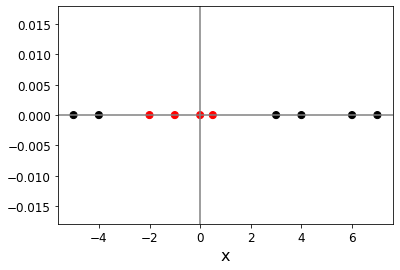

In [112]:
fig, ax = plt.subplots()
plt.scatter(d['x'], [0,0,0,0,0,0,0,0,0,0], c=d['label'], cmap=plt.cm.flag, s=50)
ax.set_xlabel("x")
ax.axhline(y=0, color='grey')
ax.axvline(x=0, color='grey')
plt.show()

In [113]:
d = pd.DataFrame({'x':[-5, -4,-2,-1, 0, 0.5, 3,4,6,7],
                  'x_square': [25,16,4,1,0, 0.025,9,16,36,49],
                 'label':[1, 1, 0,0,0,0, 1,1,1,1]})
d.to_csv('./svm_non_linear_with_ploy.csv', index=False)

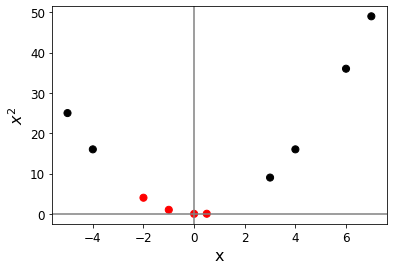

In [114]:
fig, ax = plt.subplots()
plt.scatter(d['x'], d['x_square'], c=d['label'], cmap=plt.cm.flag, s=[50,50,50,50,50,50,50,50,50,50])
ax.set_xlabel("x")
ax.set_ylabel("$x^2$")
ax.axhline(y=0, color='grey')
ax.axvline(x=0, color='grey')
plt.show()

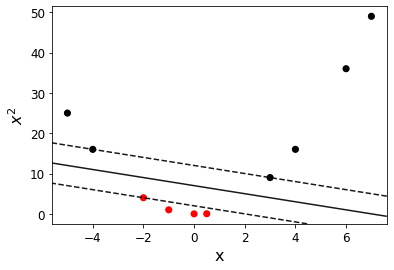

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

d = pd.DataFrame({'x':[-5, -4,-2,-1,0,0.5,3,4,6,7],
                  'x_square': [25,16,4,1,0,0.025,9,16,36,49],
                 'label':[1, 1, 0,0,0,0, 1,1,1,1]})

X = d[['x', 'x_square']].values
y = d['label'].values

# fit the model, don't regularize for illustration purposes
clf = SVC(kernel='linear', C=100)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.9,
           linestyles=['--', '-', '--'])
# plot support vectors
plt.scatter(d['x'], d['x_square'], c=d['label'], cmap=plt.cm.flag, s=50, 
            linewidth=1, facecolors='none', edgecolors='none')
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none', edgecolors='blue')
plt.xlabel("x")
plt.ylabel("$x^2$")
plt.show()

# Support Vector Machine
  * A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

### SVM Classifier:
  * This is called large margin classification. We can think of an SVM classifier as fitting the widest possible street (margin - represented by the parallel dashed lines) between the classes. 
<img src="svm_classifier.png"/>
  * Support Vectors : The closest data points to the decision boundary (optimal hyperplan) are know as Support Vectors (instances located at the edge of the street are know as support vectors). 
  * **SVM is very sensitive to feature scalling, please see below example for reference.**
<img src="svm_scallin_effect.png" />  
  

### Soft Margin vs Hard Margin - classifier
  * **Hard Margin classifier :** If we strictly impose that all instances be off the margin (street) and on the right side, this is called hard margin classification.
    * There are two main issues with hard margin classification. 
      * First, it only works if the data is linearly separable.
      <img src="hard_margin_impossible.png" />
      * Second it is quite sensitive to outliers.
      
  * **Soft Margin classifier :** A more flexible model, the objective is to find a **balance between keeping the margin (street) as large as possible and limiting the margine violations.** ((i.e., instances that end up in the middle of the street **or** even on the wrong side).
    * The balance between **"margin size"** and **"margine violation"** can be controled using **"C"** Hyperparameter.
      * A **high C value** the classifier makes **fewer margin violations but ends up with a smaller margin.**
      * A **low C value** will **generalize better** with a **much larger margin**. In below example image, many instances end up on the margin (street) with most of the margin violations are actually on the correct side of the decision boundary. This makes the model make fewer prediction errors.
      <img src="c_value.png" />
      
### More on SVM <a href="./Support_Vector_Machine.html">Support Vector Machine</a>    

https://www.youtube.com/watch?v=y6E7aIp9bO4

## LinearSVC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(10)
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [2]:
iris_data =  pd.read_csv('../Data/Iris.csv')

In [3]:
iris_data.shape

(150, 6)

In [4]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#iris_data[iris_data['Species'] == 'Iris-setosa']

In [6]:
iris = pd.DataFrame()
iris = iris.append(iris_data[iris_data['Species'] == 'Iris-setosa'])
iris = iris.append(iris_data[iris_data['Species'] == 'Iris-virginica'])

In [7]:
iris = iris.reindex()

In [8]:
from sklearn.linear_model import SGDClassifier

In [10]:
sgd = SGDClassifier()
sgd.fit(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], iris['Species'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd.coef_

array([[-16.48028252, -27.07474985,  38.25779871,  21.77751619]])

In [18]:
z = zip(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], sgd.coef_.ravel())

In [19]:
for (fet, coef) in z:
    print(fet, coef)

SepalLengthCm -16.480282519128817
SepalWidthCm -27.07474985285449
PetalLengthCm 38.25779870512049
PetalWidthCm 21.777516185991665


In [28]:
pred = sgd.predict(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [27]:
from sklearn.metrics import accuracy
accuracy(iris['Species'], sgd.predict(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]))

ImportError: cannot import name 'accuracy' from 'sklearn.metrics' (C:\Users\thisi\Anaconda3\envs\tensorflow-nogpu\lib\site-packages\sklearn\metrics\__init__.py)

<img src="iris_flowers.png" />

In [5]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [30]:
X = iris[['PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### LinearSVC is not a multi-class classifier, hence Scikit-Learn applies One-Vs-Rest and derives prediction for the multi class problem

In [32]:
svm_clf = Pipeline([ ("scaler", StandardScaler()), 
                    ("linear_svc", LinearSVC( C = 1, loss ="hinge")) ]) 
svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [33]:
svm_clf.classes_

array(['Iris-setosa', 'Iris-virginica'], dtype=object)

In [34]:
y_train_pred = svm_clf.predict(X_train)

In [35]:
confusion_matrix(y_train, y_train_pred)

array([[38,  0],
       [ 0, 42]], dtype=int64)

In [13]:

print("Precision Score : ", precision_score(y_train, y_train_pred, average="macro"))
print("Recall Score : ", recall_score(y_train, y_train_pred, average="macro"))

Precision Score :  0.919942669943
Recall Score :  0.917662080467


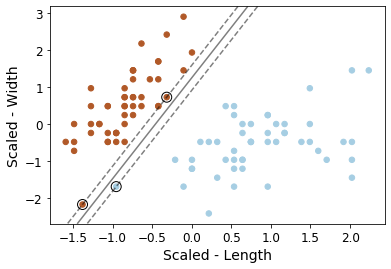

In [80]:
from sklearn.preprocessing import StandardScaler


X = iris[['SepalLengthCm', 'SepalWidthCm']].values
X[:, 1] = 2000 * X[:, 1]
sc = StandardScaler()
X = sc.fit_transform(X)

y = iris['Species'].apply(lambda x: 1 if x =='Iris-setosa' else 0)

y = y.values


# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel("Scaled - Length")
plt.ylabel("Scaled - Width")
plt.show()

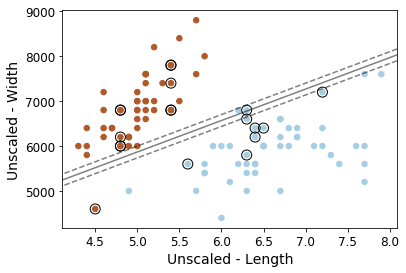

In [83]:
X = iris[['SepalLengthCm', 'SepalWidthCm']].values
X[:, 1] = 2000 * X[:, 1]
y = iris['Species'].apply(lambda x: 1 if x =='Iris-setosa' else 0)

y = y.values


# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=0.5)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel("Unscaled - Length")
plt.ylabel("Unscaled - Width")
plt.show()

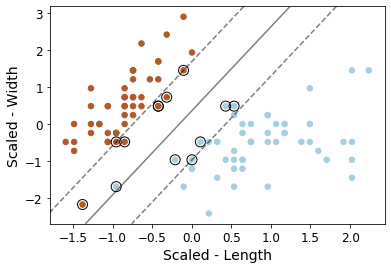

In [81]:
from sklearn.preprocessing import StandardScaler


X = iris[['SepalLengthCm', 'SepalWidthCm']].values
X[:, 1] = 2000 * X[:, 1]
sc = StandardScaler()
X = sc.fit_transform(X)

y = iris['Species'].apply(lambda x: 1 if x =='Iris-setosa' else 0)

y = y.values


# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=0.5)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel("Scaled - Length")
plt.ylabel("Scaled - Width")
plt.show()

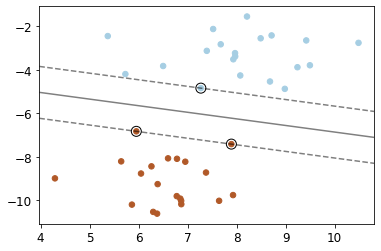

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
x1 = 10*np.random.random(10)
x2 = 10*np.random.random(10)
print(x1)
print(x2)

[4.21597321 9.3624518  4.08522204 1.69327342 2.83552107 3.6028874
 8.55233454 5.00445187 8.10029158 8.6502517 ]
[0.53534287 4.56116559 7.84447475 8.40968185 8.38793635 3.4800405
 3.25291594 1.42655152 4.2701579  1.20164411]


In [120]:
y = x1*x1 + x2*x2

In [121]:
y

array([ 18.06102212, 108.4597353 ,  78.22482315,  73.58992372,
        78.39765601,  25.09147949,  83.7238882 ,  27.07958774,
        83.84897224,  76.27080308])

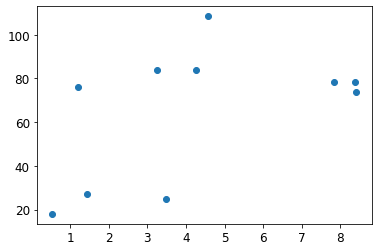

In [126]:
plt.scatter(x2, y)

In [137]:
import numpy as np
import matplotlib.pyplot as plt

pi = 3.14

def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*pi , n)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles

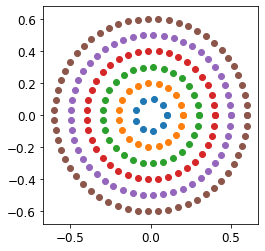

In [139]:
n = [10, 20, 30, 40, 50, 60]
r = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
circles = circle_points(r, n)

fig, ax = plt.subplots()
for circle in circles:
    ax.scatter(circle[:, 0], circle[:, 1])
ax.set_aspect('equal')
plt.show()

In [3]:
from mpl_toolkits import mplot3d

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

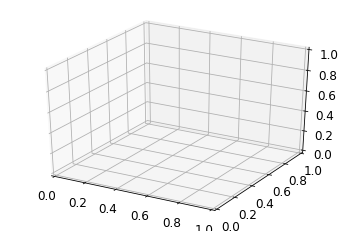

In [144]:
fig = plt.figure()
ax = plt.axes(projection='3d')

(120, 3)


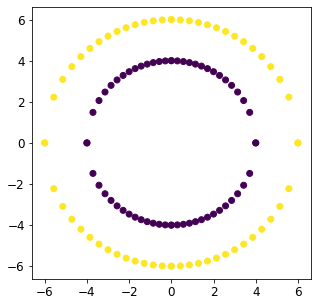

In [210]:
plt.figure(figsize=(5,5))

x1_1 = np.linspace(0, 6, 15)
x1_2 = np.linspace(-6, 0, 15)
x1_3 = np.linspace(0, 6, 15)
x1_4 = np.linspace(-6, 0, 15)

x1_5 = np.linspace(0, 4, 15)
x1_6 = np.linspace(-4, 0, 15)
x1_7 = np.linspace(0, 4, 15)
x1_8 = np.linspace(-4, 0, 15)


x2_1 = np.array([np.sqrt(36 - x**2) for x in x1_1])
x2_2 = np.array([-np.sqrt(36 - x**2) for x in x1_2])
x2_3 = np.array([-np.sqrt(36 - x**2) for x in x1_3])
x2_4 = np.array([np.sqrt(36 - x**2) for x in x1_4])

x2_5 = np.array([np.sqrt(16 - x**2) for x in x1_5])
x2_6 = np.array([-np.sqrt(16 - x**2) for x in x1_6])
x2_7 = np.array([-np.sqrt(16 - x**2) for x in x1_7])
x2_8 = np.array([np.sqrt(16 - x**2) for x in x1_8])

x1 = np.hstack((x1_1, x1_2, x1_3, x1_4))
x2 = np.hstack((x2_1, x2_2, x2_3, x2_4))

a1 = np.hstack((x1_5, x1_6, x1_7, x1_8))
a2 = np.hstack((x2_5, x2_6, x2_7, x2_8))

#print(x2.shape)
#plt.scatter(x1, x2, c='b')
#plt.scatter(a1, a2, c='r')

df1 = pd.DataFrame({'x1': x1,
                  'x2': x2,
                   'label': np.ones(x2.shape)})

df2 = pd.DataFrame({'x1': a1,
                  'x2': a2,
                   'label': np.zeros(a2.shape)})

df = pd.concat([df1, df2], ignore_index=True)

print(df.shape)

plt.scatter(df.x1,df.x2, c=df.label)

#df.to_csv("./kernal_svm_circular_data.csv", index=False)

In [214]:
df = pd.read_csv('./kernal_svm_circular_data.csv')

df.head()

,x1,x2,label
0,0.000000,6.000000,1.0
1,0.428571,5.984674,1.0
2,0.857143,5.938460,1.0
3,1.285714,5.860626,1.0
4,1.714286,5.749889,1.0


In [223]:
df.loc[0, ['x1', 'x2']].values

array([0., 6.])

X [[0.         6.         0.42857143 ... 3.98978287 0.         4.        ]
 [0.         6.         0.42857143 ... 3.98978287 0.         4.        ]
 [0.         6.         0.42857143 ... 3.98978287 0.         4.        ]
 ...
 [0.         6.         0.42857143 ... 3.98978287 0.         4.        ]
 [0.         6.         0.42857143 ... 3.98978287 0.         4.        ]
 [0.         6.         0.42857143 ... 3.98978287 0.         4.        ]]
Y [[0.         0.         0.         ... 0.         0.         0.        ]
 [6.         6.         6.         ... 6.         6.         6.        ]
 [0.42857143 0.42857143 0.42857143 ... 0.42857143 0.42857143 0.42857143]
 ...
 [3.98978287 3.98978287 3.98978287 ... 3.98978287 3.98978287 3.98978287]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [4.         4.         4.         ... 4.         4.         4.        ]]
Z 0.0


ValueError: Argument Z must be 2-dimensional.

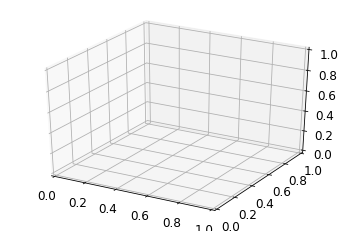

In [237]:
def f(x, y, sigma):
    return np.exp( - np.sum((x - y)**2) /(2* sigma**2))

                  
df = pd.read_csv('./kernal_svm_circular_data.csv')                  
#row1 = df.loc[0, ['x1', 'x2']].values
#rows = df[['x1', 'x2']].values
#landmarks = df[['x1', 'x2']].values

X, Y = np.meshgrid(df[['x1', 'x2']], df[['x1', 'x2']])
sigma = 1
Z = f(X, Y, sigma)

print('X',X)
print('Y', Y)
print('Z', Z)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

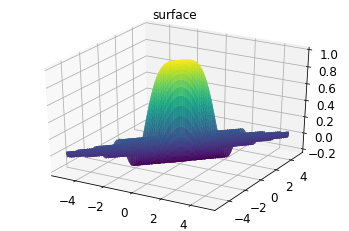

In [227]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

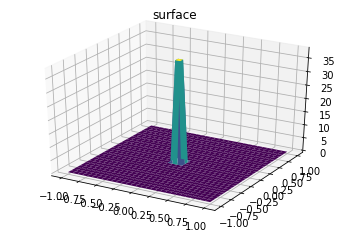

In [5]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]
# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([.025, .025])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go


def plotly_plot_bivariate_normal_pdf(x, y, z, name=""):
    fig = go.Figure(data=[go.Surface(x=y, y=x, z=z)])
    fig.update_traces(contours_z=dict(show=True, 
                                      usecolormap=True,
                                      highlightcolor="limegreen", 
                                      project_z=True))
    fig.update_layout(title=name, autosize=False,
                      scene_camera_eye=dict(x=1.5, y=-1.5, z=1.5),
                      width=1200, height=600,
                      margin=dict(l=50, r=50, b=50, t=50))
    fig.show()

In [15]:
import plotly.graph_objects as go

def plotly_plot_bivariate_normal_pdf(x, y, z, name=""):
    fig = go.Figure(data=[go.Surface(x=y, y=x, z=z)])
    fig.update_traces(contours_z=dict(show=True, 
                                      usecolormap=True,
                                      highlightcolor="limegreen", 
                                      project_z=True))
    fig.update_layout(title=name, autosize=False,
                      scene_camera_eye=dict(x=1.5, y=-1.5, z=1.5),
                      width=1200, height=600,
                      margin=dict(l=50, r=50, b=50, t=50))
    fig.show()

In [ ]:
# https://towardsdatascience.com/a-python-tutorial-on-generating-and-plotting-a-3d-guassian-distribution-8c6ec6c41d03

import math
import numpy as np

def py_bivariate_normal_pdf(domain, mean, variance):
    X = [[-mean+x*variance for x in range(int((-domain+mean)//variance), 
                                                   int((domain+mean)//variance)+1)] 
                  for _ in range(int((-domain+mean)//variance), 
                                 int((domain+mean)//variance)+1)]
    Y = [*map(list, zip(*X))]
    R = [[math.sqrt(a**2 + b**2) for a, b in zip(c, d)] for c, d in zip(X, Y)]
    Z = [[(1. / math.sqrt(2 * math.pi)) * math.exp(-.5*r**2) for r in r_sub] for r_sub in R]
    X = [*map(lambda a: [b+mean for b in a], X)]
    Y = [*map(lambda a: [b+mean for b in a], Y)]
    return  np.array(X), np.array(Y), np.array(Z)

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plt_plot_bivariate_normal_pdf(x, y, z, name=""):
  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca(projection='3d')
  ax.plot_surface(x, y, z, 
                  cmap=cm.coolwarm,
                  linewidth=0, 
                  antialiased=True)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');
  plt.show()

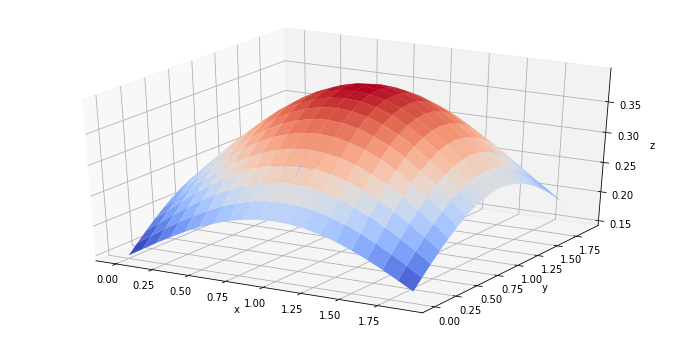

In [37]:
plt_plot_bivariate_normal_pdf(*py_bivariate_normal_pdf(1, 1, .1))